# Humann Development vs world bank

blablabla

In [1]:
import pandas as pd #To manage data sets as dataframes
import numpy as np # To create random lists
import matplotlib.pyplot as plt #To plot
from scipy import stats as st#To make regression and other statistical analysis

In [2]:
#Lets call the data base

directory = "data.csv"

world = pd.read_csv(directory)

In [3]:
world.head()

,Country Code,Country Name,Year,GDP USD,perc_homicide,perc_internet,per_basic_sanit,perc_drink_water,gdi,hdi,prison_pop,gii,perc_for_inv,perc_research_dev,mob_subs,pop_total,pop_2nd_ed
0,ARE,United Arab Emirates,2005.0,2.573669e+11,1.2,40.0,99.0,96.0,NaN,0.809,217.0,0.592,6.035,NaN,98.821,4.588,62.700
1,ARE,United Arab Emirates,2010.0,2.897873e+11,0.8,68.0,99.0,96.0,NaN,0.821,NaN,0.231,3.036,NaN,127.790,8.550,64.285
2,ARE,United Arab Emirates,2011.0,3.098704e+11,0.6,78.0,99.0,96.0,0.956,0.826,NaN,0.237,2.040,0.486,131.080,8.947,65.145
3,ARE,United Arab Emirates,2012.0,3.237669e+11,0.8,85.0,99.0,96.0,0.955,0.832,110.0,0.227,2.554,NaN,150.688,9.142,66.005
4,ARE,United Arab Emirates,2013.0,3.401280e+11,0.6,88.0,99.0,96.0,0.956,0.839,111.0,0.216,2.503,NaN,174.643,9.198,66.864


In [4]:
count = world["perc_homicide"].isna().sum()
count

172

## Knowing tha data

blblablabla

In [5]:
#Lets get the number of countries
num =len(world["Country Name"].unique())

print(f"There are indicators for {num} countries")

There are indicators for 115 countries


In [6]:
countries = world["Country Name"].unique()

print(f"Those countries are: {countries}")

Those countries are: ['United Arab Emirates' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Burkina Faso' 'Bulgaria' 'Bahrain'
 'Bosnia and Herzegovina' 'Belarus' 'Bolivia' 'Brazil' 'Botswana' 'Canada'
 'Switzerland' 'Chile' 'China' 'Colombia' 'Cabo Verde' 'Costa Rica'
 'Cyprus' 'Czech Republic' 'Germany' 'Denmark' 'Algeria' 'Ecuador'
 'Egypt, Arab Rep.' 'Spain' 'Estonia' 'Finland' 'France' 'United Kingdom'
 'Georgia' 'Ghana' 'Greece' 'Guatemala' 'Honduras' 'Croatia' 'Hungary'
 'Indonesia' 'India' 'Ireland' 'Iran, Islamic Rep.' 'Iraq' 'Iceland'
 'Israel' 'Italy' 'Jordan' 'Japan' 'Kazakhstan' 'Kenya' 'Kyrgyz Republic'
 'Cambodia' 'Korea, Rep.' 'Kuwait' 'Sri Lanka' 'Lesotho' 'Lithuania'
 'Luxembourg' 'Latvia' 'Morocco' 'Moldova' 'Mexico' 'North Macedonia'
 'Malta' 'Myanmar' 'Montenegro' 'Mongolia' 'Mozambique' 'Mauritius'
 'Malaysia' 'Namibia' 'Nicaragua' 'Netherlands' 'Norway' 'New Zealand'
 'Oman' 'Pakistan' 'Panama' 'Peru' 'Philippines' 'Papua New Guine

In [7]:
anio = world["Year"].nunique()
print(f"And there is information of {anio} different years")

And there is information of 9 different years


However, there are some indicators with a lot of NA's values.

In [8]:
#Count the number of NA´s for each indicator
number_na = {}
# iterating the columns 
for col in world.columns: 
    a = world[col].isna().sum() 
    number_na.update({f"{col}":a})

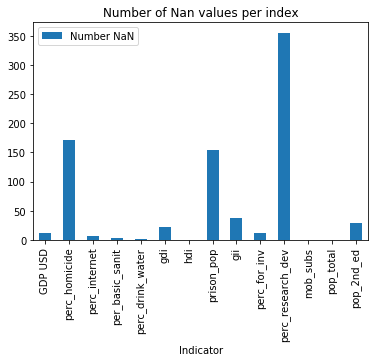

In [9]:
nas_df = pd.DataFrame.from_dict(number_na, orient='index', columns=['Number NaN'])
nas_df.drop(["Country Code", "Country Name", "Year"], inplace=True)
nas_df.reset_index(inplace=True)
nas_df.rename(columns={'index':'Indicator'}, inplace=True)
nas_df.plot(kind="bar", x= 'Indicator', y='Number NaN', title="Number of Nan values per index")

There are three indices that have a lot of null values, therefore are not useful por a time analysis. Such indicators are:

* percentage homicide

* prision population

* percentage research dev


In [10]:
#Lets drop columns
world.drop(['perc_homicide', 'prison_pop', 'perc_research_dev'], axis=1, inplace=True)
world

,Country Code,Country Name,Year,GDP USD,perc_internet,per_basic_sanit,perc_drink_water,gdi,hdi,gii,perc_for_inv,mob_subs,pop_total,pop_2nd_ed
0,ARE,United Arab Emirates,2005.0,2.573669e+11,40.0,99.0,96.0,NaN,0.809,0.592,6.035,98.821,4.588,62.700
1,ARE,United Arab Emirates,2010.0,2.897873e+11,68.0,99.0,96.0,NaN,0.821,0.231,3.036,127.790,8.550,64.285
2,ARE,United Arab Emirates,2011.0,3.098704e+11,78.0,99.0,96.0,0.956,0.826,0.237,2.040,131.080,8.947,65.145
3,ARE,United Arab Emirates,2012.0,3.237669e+11,85.0,99.0,96.0,0.955,0.832,0.227,2.554,150.688,9.142,66.005
4,ARE,United Arab Emirates,2013.0,3.401280e+11,88.0,99.0,96.0,0.956,0.839,0.216,2.503,174.643,9.198,66.864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,ZMB,Zambia,2013.0,2.418280e+10,NaN,26.0,58.0,0.929,0.559,0.585,7.487,69.646,14.927,37.662
1031,ZMB,Zambia,2014.0,2.531884e+10,NaN,26.0,58.0,0.933,0.565,0.584,5.553,65.682,15.400,39.008
1032,ZMB,Zambia,2015.0,2.605814e+10,NaN,26.0,59.0,0.935,0.570,0.571,7.482,72.785,15.879,40.354
1033,ZMB,Zambia,2016.0,2.704230e+10,NaN,26.0,59.0,0.941,0.580,0.548,3.163,73.438,16.363,41.700


# Country analysis
blabalbalbab

In [11]:
#Lets group by country
country_gpe = world.groupby(by="Country Code")

In [12]:
datos = country_gpe.apply(lambda x: x.isna().sum())
datos.drop(['Country Code', 'Country Name', 'Year'], axis=1, inplace=True)
datos["sum"] = datos.sum(axis=1)

In [13]:
datos.sort_values(by=['sum'], inplace=True)
datos.reset_index(inplace=True)
datos

,Country Code,GDP USD,perc_internet,per_basic_sanit,perc_drink_water,gdi,hdi,gii,perc_for_inv,mob_subs,pop_total,pop_2nd_ed,sum
0,KWT,0,0,0,0,0,0,0,0,0,0,0,0
1,MEX,0,0,0,0,0,0,0,0,0,0,0,0
2,MDA,0,0,0,0,0,0,0,0,0,0,0,0
3,MAR,0,0,0,0,0,0,0,0,0,0,0,0
4,LVA,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,MMR,0,0,0,0,8,0,1,0,0,0,0,9
111,PNG,0,0,0,0,9,0,0,0,0,0,0,9
112,MKD,0,0,0,0,0,0,6,0,0,0,6,12
113,CPV,0,0,0,0,0,0,6,0,0,0,6,12


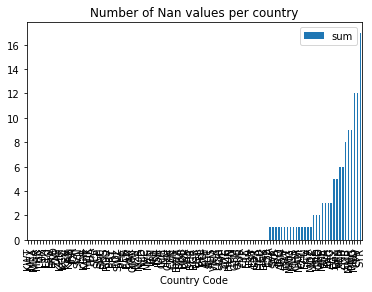

In [14]:
datos.plot(kind="bar", x= 'Country Code', y='sum', title="Number of Nan values per country")

In [15]:
#Lets remove from original data the countries with NA's
no_zero =datos.loc[datos['sum']!=0]
remove_countries = no_zero['Country Code'].tolist()
remove_countries

['TZA',
 'SVK',
 'SRB',
 'IRQ',
 'ARM',
 'HRV',
 'QAT',
 'MNG',
 'MUS',
 'GHA',
 'NAM',
 'CHL',
 'ECU',
 'ITA',
 'MOZ',
 'ARE',
 'HND',
 'GEO',
 'MNE',
 'BLR',
 'BIH',
 'ARG',
 'EGY',
 'BFA',
 'VEN',
 'ZMB',
 'UZB',
 'MMR',
 'PNG',
 'MKD',
 'CPV',
 'SYR']

In [16]:
small_world = world[~world['Country Code'].isin(remove_countries)]
small_world

,Country Code,Country Name,Year,GDP USD,perc_internet,per_basic_sanit,perc_drink_water,gdi,hdi,gii,perc_for_inv,mob_subs,pop_total,pop_2nd_ed
27,AUS,Australia,2005.0,9.955495e+11,63.000,100.0,100.0,0.969,0.902,0.139,-3.619,91.285,20.179,90.854
28,AUS,Australia,2010.0,1.146138e+12,76.000,100.0,100.0,0.975,0.926,0.138,3.072,101.559,22.155,93.200
29,AUS,Australia,2011.0,1.174365e+12,79.488,100.0,100.0,0.976,0.928,0.132,4.694,105.551,22.538,93.608
30,AUS,Australia,2012.0,1.220379e+12,79.000,100.0,100.0,0.976,0.932,0.127,3.722,106.261,22.904,94.449
31,AUS,Australia,2013.0,1.251924e+12,83.454,100.0,100.0,0.974,0.926,0.119,3.426,107.246,23.255,91.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,ZAF,South Africa,2013.0,4.061050e+11,46.500,72.0,91.0,0.980,0.683,0.430,2.245,143.173,53.687,74.581
1022,ZAF,South Africa,2014.0,4.136057e+11,49.000,73.0,91.0,0.983,0.691,0.428,1.652,145.351,54.544,74.903
1023,ZAF,South Africa,2015.0,4.185431e+11,51.919,74.0,92.0,0.982,0.699,0.427,0.479,158.883,55.386,74.903
1024,ZAF,South Africa,2016.0,4.202134e+11,54.000,75.0,92.0,0.982,0.702,0.426,0.749,146.622,56.208,75.718


In [17]:
#Let get the number of countries
num =len(small_world["Country Name"].unique())
num_2 = len(small_world["Year"].unique())
print(f"Now there are indicators for {num} countries in {num_2} different years")

Now there are indicators for 83 countries in 9 different years


# The world in numbers

abrfliuqergfbiuaerrb

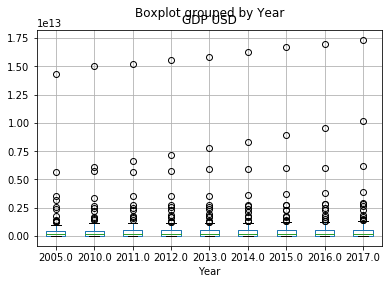

In [18]:
boxplot = small_world.boxplot(column="GDP USD", by="Year")


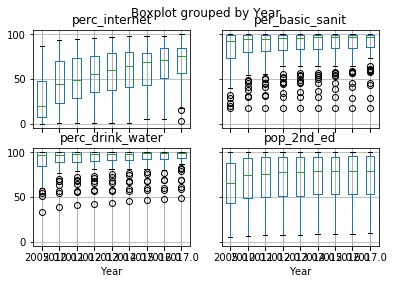

In [19]:
#Access to services
lista = ['perc_internet', 'per_basic_sanit', 'perc_drink_water','pop_2nd_ed']
boxplot = small_world.boxplot(column=lista, by="Year")

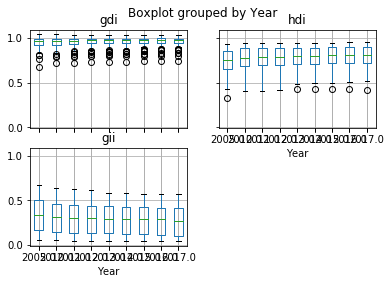

In [20]:
#Well being indicators
lista = ["gdi", "hdi", "gii"]
boxplot = small_world.boxplot(column=lista, by="Year")

In [21]:
#Scatter plots
groups = small_world.groupby("Year")

        

In [22]:
#Create a function variables_y = ["perc_internet", "per_basic_sanit", "perc_drink_water", "pop_2nd_ed"]
def sctr_plot(variable):
    for name, group in groups:
        plt.plot(group["GDP USD"], group[variable], marker="o", linestyle="", label=name)
        plt.title=f"GDP USD vs {variable}"
        plt.legend(bbox_to_anchor=(1.05, 1))

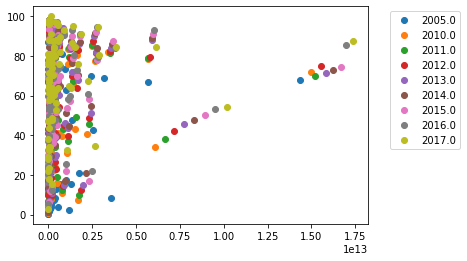

In [23]:
sctr_plot(variable="perc_internet")

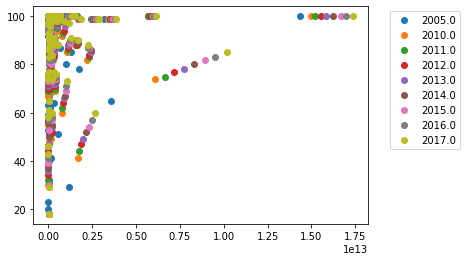

In [24]:
sctr_plot(variable="per_basic_sanit")

No handles with labels found to put in legend.


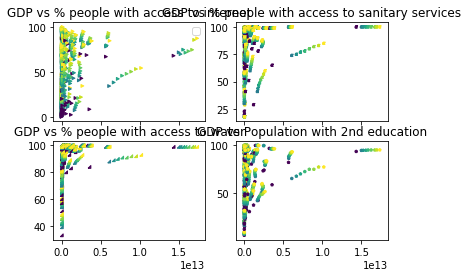

In [25]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)

# marker symbol
axs[0, 0].scatter(small_world["GDP USD"], small_world["perc_internet"], s=8, c=small_world["Year"], marker=">")
axs[0, 0].set_title("GDP vs % people with access to internet")
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[0, 0].legend(handles, labels)
axs[0, 0].legend(loc="upper right")

# marker from TeX
axs[0, 1].scatter(small_world["GDP USD"], small_world["per_basic_sanit"], s=8, c=small_world["Year"], marker=r'$\alpha$')
axs[0, 1].set_title("GDP vs % people with access to sanitary services")
#axs[0, 1].legend(handles=[axs[0, 1]], loc='upper right')

# marker from path
verts = [[-1, -1], [1, -1], [1, 1], [-1, -1]]
axs[1, 0].scatter(small_world["GDP USD"], small_world["perc_drink_water"], s=8, c=small_world["Year"], marker=verts)
axs[1, 0].set_title("GDP vs % people with access to water")

# regular polygon marker
axs[1, 1].scatter(small_world["GDP USD"], small_world["pop_2nd_ed"], s=8, c=small_world["Year"], marker=(5, 0))
axs[1, 1].set_title("GDP vs Population with 2nd education")

#plt.tight_layout()
plt.show()

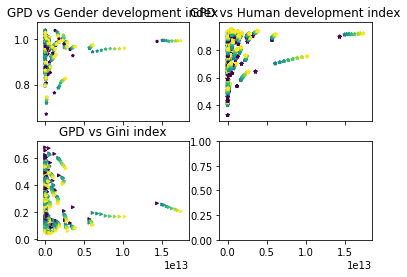

In [26]:
fig, axs = plt.subplots(2, 2, sharex=True)

# regular star marker
axs[0, 0].scatter(small_world["GDP USD"], small_world["gdi"], s=8, c=small_world["Year"], marker=(5, 1))
axs[0, 0].set_title("GPD vs Gender development index")

# regular asterisk marker
axs[0, 1].scatter(small_world["GDP USD"], small_world["hdi"], s=8, c=small_world["Year"], marker=(5, 2))
axs[0, 1].set_title("GPD vs Human development index")

# marker symbol
axs[1, 0].scatter(small_world["GDP USD"], small_world["gii"], s=8, c=small_world["Year"], marker=">")
axs[1, 0].set_title("GPD vs Gini index")



#plt.tight_layout()
plt.show()

# The distribution of the countries per group
kjsdbcaklwgiulrliu

In [27]:
#Distribution of countries by HDI
#Lets create the bins
bins =[0,0.55, 0.6999,0.7999,1]
print(bins)

[0, 0.55, 0.6999, 0.7999, 1]


In [28]:
groups_name =["low", "medium","high", "very high"]
groups_name

['low', 'medium', 'high', 'very high']

In [29]:
#Apply the division in groups over non duplicated df
small_world["HDI group"] = pd.cut(small_world["hdi"], bins, labels=groups_name, include_lowest=True )
small_world

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country Code,Country Name,Year,GDP USD,perc_internet,per_basic_sanit,perc_drink_water,gdi,hdi,gii,perc_for_inv,mob_subs,pop_total,pop_2nd_ed,HDI group
27,AUS,Australia,2005.0,9.955495e+11,63.000,100.0,100.0,0.969,0.902,0.139,-3.619,91.285,20.179,90.854,very high
28,AUS,Australia,2010.0,1.146138e+12,76.000,100.0,100.0,0.975,0.926,0.138,3.072,101.559,22.155,93.200,very high
29,AUS,Australia,2011.0,1.174365e+12,79.488,100.0,100.0,0.976,0.928,0.132,4.694,105.551,22.538,93.608,very high
30,AUS,Australia,2012.0,1.220379e+12,79.000,100.0,100.0,0.976,0.932,0.127,3.722,106.261,22.904,94.449,very high
31,AUS,Australia,2013.0,1.251924e+12,83.454,100.0,100.0,0.974,0.926,0.119,3.426,107.246,23.255,91.081,very high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,ZAF,South Africa,2013.0,4.061050e+11,46.500,72.0,91.0,0.980,0.683,0.430,2.245,143.173,53.687,74.581,medium
1022,ZAF,South Africa,2014.0,4.136057e+11,49.000,73.0,91.0,0.983,0.691,0.428,1.652,145.351,54.544,74.903,medium
1023,ZAF,South Africa,2015.0,4.185431e+11,51.919,74.0,92.0,0.982,0.699,0.427,0.479,158.883,55.386,74.903,medium
1024,ZAF,South Africa,2016.0,4.202134e+11,54.000,75.0,92.0,0.982,0.702,0.426,0.749,146.622,56.208,75.718,high


In [30]:
years = small_world["Year"].unique().tolist()
#years
pie_size_dict = {}
pie_label_dict = {}

for year in years :
    aux = small_world.loc[small_world["Year"] == year]
    group = aux.groupby('HDI group').size().reset_index(name="Frequency")

    key_lab =f"{year}"
    
    pie_size_dict.update({key_lab : group['Frequency'].tolist()})
    pie_label_dict.update({key_lab :group['HDI group'].tolist()})
    
len(pie_size_dict)

9

Text(0.5, 1.0, '2017.0')

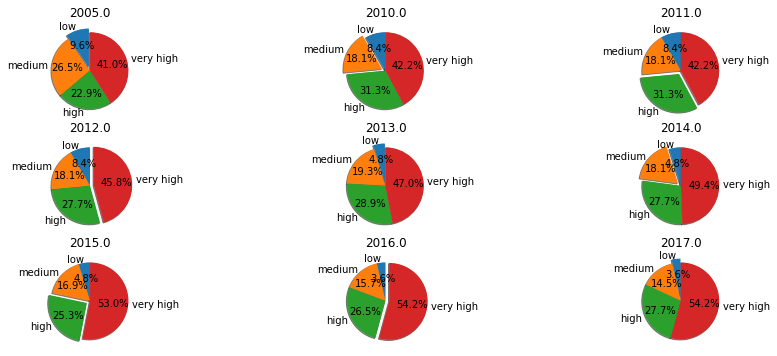

In [31]:
#Lets make the graphs
# Create four polar axes and access them through the returned array
f, ((ax1, ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(ncols=3, nrows=3,figsize=(15, 6))

####First plot
labels =list(pie_label_dict.values())[0]
sizes = list(pie_size_dict.values())[0]
explode = (0.1,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title(list(pie_size_dict.keys())[0])

####Second plot
labels =list(pie_label_dict.values())[1]
sizes = list(pie_size_dict.values())[1]
explode = (0,0.1,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title(list(pie_size_dict.keys())[1])

####Third plot
labels =list(pie_label_dict.values())[2]
sizes = list(pie_size_dict.values())[2]
explode = (0,0,0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.set_title(list(pie_size_dict.keys())[2])

####4th plot
labels =list(pie_label_dict.values())[3]
sizes = list(pie_size_dict.values())[3]
explode = (0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.set_title(list(pie_size_dict.keys())[3])

####5th plot
labels =list(pie_label_dict.values())[4]
sizes = list(pie_size_dict.values())[4]
explode = (0.1,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax5.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax5.set_title(list(pie_size_dict.keys())[4])

####6th plot
labels =list(pie_label_dict.values())[5]
sizes = list(pie_size_dict.values())[5]
explode = (0,0.1,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax6.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax6.set_title(list(pie_size_dict.keys())[5])

####7th plot
labels =list(pie_label_dict.values())[6]
sizes = list(pie_size_dict.values())[6]
explode = (0,0,0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax7.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax7.set_title(list(pie_size_dict.keys())[6])

####8th plot
labels =list(pie_label_dict.values())[7]
sizes = list(pie_size_dict.values())[7]
explode = (0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax8.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax8.set_title(list(pie_size_dict.keys())[7])

####9th plot
labels =list(pie_label_dict.values())[8]
sizes = list(pie_size_dict.values())[8]
explode = (0.1,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax9.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax9.set_title(list(pie_size_dict.keys())[8])




# A regression per year

First, lets find the correlation per year and of GDP and each of the well being indicators

In [32]:
#
cor_dict = {}

years = small_world["Year"].unique().tolist()

for year in years :
    aux = small_world.loc[small_world["Year"] == year]
    corr_1, pval = st.pearsonr(aux["GDP USD"], aux["perc_internet"])
    corr_2, pval = st.pearsonr(aux["GDP USD"], aux["per_basic_sanit"])
    corr_3, pval = st.pearsonr(aux["GDP USD"], aux["perc_drink_water"])
    corr_4, pval = st.pearsonr(aux["GDP USD"], aux["perc_for_inv"])
    corr_5, pval = st.pearsonr(aux["GDP USD"], aux["gdi"])
    corr_6, pval = st.pearsonr(aux["GDP USD"], aux["hdi"])
    corr_7, pval = st.pearsonr(aux["GDP USD"], aux["gii"])
    corr_8, pval = st.pearsonr(aux["GDP USD"], aux["pop_2nd_ed"])
    corr_9, pval = st.pearsonr(aux["GDP USD"], aux["mob_subs"])
    corr_10, pval = st.pearsonr(aux["GDP USD"], aux["pop_total"])
    list_v = [corr_1,corr_2,corr_3,corr_4,corr_5,corr_6,corr_7,corr_8,corr_9,corr_10]
    key_lab =f"{year}"
    
    cor_dict.update({key_lab : list_v})


In [33]:
#Lets create a df
correlation_df = pd.DataFrame.from_dict(cor_dict, orient='index',
                       columns=['perc_internet', 'per_basic_sanit','perc_drink_water','perc_for_inv','gdi', 'hdi','gii',
                                'pop_2nd_edA', 'mob_subs', 'pop_total'])

In [34]:
correlation_df

,perc_internet,per_basic_sanit,perc_drink_water,perc_for_inv,gdi,hdi,gii,pop_2nd_edA,mob_subs,pop_total
2005.0,0.286087,0.150602,0.167465,-0.060907,0.105673,0.240016,-0.181555,0.202629,0.096856,0.340312
2010.0,0.211399,0.131766,0.149417,-0.085059,0.081635,0.225106,-0.168421,0.179479,-0.103183,0.438512
2011.0,0.185542,0.128087,0.146210,-0.062151,0.075086,0.222487,-0.164988,0.179538,-0.139398,0.455474
2012.0,0.183479,0.125682,0.143015,-0.074486,0.072269,0.219506,-0.162271,0.170791,-0.160580,0.468522
2013.0,0.162184,0.121608,0.138587,-0.051142,0.067192,0.211155,-0.163274,0.167783,-0.157814,0.482742
2014.0,0.154592,0.119989,0.132269,-0.111125,0.061063,0.207049,-0.168422,0.169366,-0.122439,0.495797
2015.0,0.146307,0.120587,0.130459,-0.078380,0.055799,0.201865,-0.170049,0.165711,-0.111255,0.507289
2016.0,0.165120,0.117426,0.123102,-0.085617,0.052974,0.198334,-0.170890,0.165407,-0.082271,0.522047
2017.0,0.136711,0.119658,0.123562,-0.055930,0.050328,0.193603,-0.173113,0.163513,-0.059825,0.534334


In [35]:
#Lets divide de gdp in four groups per year
year_gp = small_world.groupby(by="Year")

In [36]:
#Lets get the minimum
minimal = year_gp["GDP USD"].min()
minimal

Year
2005.0    1.628344e+09
2010.0    2.032135e+09
2011.0    2.114083e+09
2012.0    2.208090e+09
2013.0    2.316821e+09
2014.0    2.415069e+09
2015.0    2.320882e+09
2016.0    2.306956e+09
2017.0    2.318491e+09
Name: GDP USD, dtype: float64

In [37]:
maximal = year_gp["GDP USD"].max()

In [38]:
prueba = pd.DataFrame({"Minimum": minimal, "Maximum": maximal})
prueba

,Minimum,Maximum
Year,,
2005.0,1.628344e+09,1.433250e+13
2010.0,2.032135e+09,1.499205e+13
2011.0,2.114083e+09,1.522455e+13
2012.0,2.208090e+09,1.556704e+13
2013.0,2.316821e+09,1.585380e+13
2014.0,2.415069e+09,1.624253e+13
2015.0,2.320882e+09,1.671046e+13
2016.0,2.306956e+09,1.697235e+13
2017.0,2.318491e+09,1.734863e+13


In [39]:
prueba["Range"] = prueba["Maximum"]-prueba["Minimum"]
prueba

,Minimum,Maximum,Range
Year,,,
2005.0,1.628344e+09,1.433250e+13,1.433087e+13
2010.0,2.032135e+09,1.499205e+13,1.499002e+13
2011.0,2.114083e+09,1.522455e+13,1.522244e+13
2012.0,2.208090e+09,1.556704e+13,1.556483e+13
2013.0,2.316821e+09,1.585380e+13,1.585148e+13
2014.0,2.415069e+09,1.624253e+13,1.624011e+13
2015.0,2.320882e+09,1.671046e+13,1.670814e+13
2016.0,2.306956e+09,1.697235e+13,1.697004e+13
2017.0,2.318491e+09,1.734863e+13,1.734631e+13


In [40]:
prueba["divide"]= prueba["Range"]/4
prueba

,Minimum,Maximum,Range,divide
Year,,,,
2005.0,1.628344e+09,1.433250e+13,1.433087e+13,3.582718e+12
2010.0,2.032135e+09,1.499205e+13,1.499002e+13,3.747505e+12
2011.0,2.114083e+09,1.522455e+13,1.522244e+13,3.805610e+12
2012.0,2.208090e+09,1.556704e+13,1.556483e+13,3.891208e+12
2013.0,2.316821e+09,1.585380e+13,1.585148e+13,3.962870e+12
2014.0,2.415069e+09,1.624253e+13,1.624011e+13,4.060028e+12
2015.0,2.320882e+09,1.671046e+13,1.670814e+13,4.177035e+12
2016.0,2.306956e+09,1.697235e+13,1.697004e+13,4.242510e+12
2017.0,2.318491e+09,1.734863e+13,1.734631e+13,4.336577e+12


In [41]:
prueba.reset_index(inplace = True)

In [42]:
prueba

,Year,Minimum,Maximum,Range,divide
0,2005.0,1.628344e+09,1.433250e+13,1.433087e+13,3.582718e+12
1,2010.0,2.032135e+09,1.499205e+13,1.499002e+13,3.747505e+12
2,2011.0,2.114083e+09,1.522455e+13,1.522244e+13,3.805610e+12
3,2012.0,2.208090e+09,1.556704e+13,1.556483e+13,3.891208e+12
4,2013.0,2.316821e+09,1.585380e+13,1.585148e+13,3.962870e+12
5,2014.0,2.415069e+09,1.624253e+13,1.624011e+13,4.060028e+12
6,2015.0,2.320882e+09,1.671046e+13,1.670814e+13,4.177035e+12
7,2016.0,2.306956e+09,1.697235e+13,1.697004e+13,4.242510e+12
8,2017.0,2.318491e+09,1.734863e+13,1.734631e+13,4.336577e+12
